In [1]:
from keras import models
from keras import layers

Using TensorFlow backend.
/home/ab/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from keras.datasets import imdb

<strong> 
keras downloads the dataset
</strong>

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
max(max(test_data))

9927

In [5]:
max(max(train_data))

9995

We have maxmium col of 88455

In [6]:
import numpy as np
def vectorize_sequence(data,dimensions=10000):
    result = np.zeros((len(data),dimensions))
    for i,sequence in enumerate(data):
        result[i, sequence] =1
    return result

In [7]:
x_train = vectorize_sequence(train_data)

In [8]:
x_test = vectorize_sequence(test_data)

In [9]:
y_train = np.asarray(train_labels).astype('float32')

In [10]:
y_test = np.asarray(test_labels).astype('float32')

Prepare the model

In [44]:
from keras import optimizers
from keras import metrics
from keras import losses
def get_model(unit1=16,unit2=16):
    
    model = models.Sequential()
    model.add(layer=layers.Dense(units=unit1,activation="relu",input_shape=(x_train.shape[1],)))
    model.add(layer=layers.Dense(units=unit2,activation='relu'))
    model.add(layer=layers.Dense(units=1,activation='sigmoid'))
    model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy]
             )
    return model

In [45]:
model = get_model()

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [47]:
history = model.fit(x=partial_x_train,y=partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.5208 - binary_accuracy: 0.7754 - val_loss: 0.3976 - val_binary_accuracy: 0.8492
Epoch 2/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.3099 - binary_accuracy: 0.8995 - val_loss: 0.3091 - val_binary_accuracy: 0.8812
Epoch 3/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.2263 - binary_accuracy: 0.9267 - val_loss: 0.2717 - val_binary_accuracy: 0.8908
Epoch 4/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1807 - binary_accuracy: 0.9429 - val_loss: 0.2664 - val_binary_accuracy: 0.8901
Epoch 5/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.1470 - binary_accuracy: 0.9538 - val_loss: 0.3314 - val_binary_accuracy: 0.8711
Epoch 6/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1255 - binary_accuracy: 0.9594 - val_loss: 0.2837 - val_binar

In [50]:
def history_plot_loss(history):
    history_dict = history.history
    train_loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs,train_loss,'r',label='Tranning Loss')
    plt.plot(epochs,val_loss,'g',label='Validation Loss')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

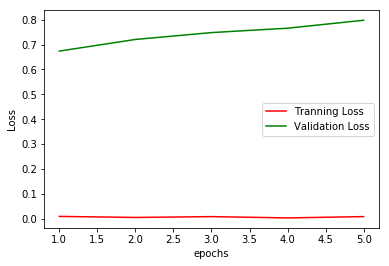

In [51]:
history_plot_loss(history)

In [57]:
def history_plot_acc(history):
    history_dict = history.history
    train_acc = history_dict['binary_accuracy']
    val_acc = history_dict['val_binary_accuracy']
    epochs = range(1, len(train_acc) + 1)
    plt.plot(epochs,train_acc,'r',label='Tranning Acc')
    plt.plot(epochs,val_acc,'g',label='Validation Acc')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

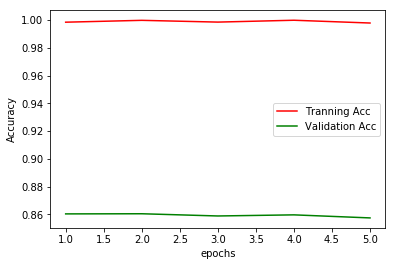

In [58]:
history_plot_acc(history)

In [65]:
model1 = get_model(512,256)

In [66]:
history = model1.fit(x=partial_x_train,y=partial_y_train,epochs=5,batch_size=100,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 21s 1ms/step - loss: 0.3748 - binary_accuracy: 0.8381 - val_loss: 0.3111 - val_binary_accuracy: 0.8698
Epoch 2/5
15000/15000 [==============================] - 21s 1ms/step - loss: 0.1771 - binary_accuracy: 0.9370 - val_loss: 0.2994 - val_binary_accuracy: 0.8888
Epoch 3/5
15000/15000 [==============================] - 21s 1ms/step - loss: 0.0770 - binary_accuracy: 0.9767 - val_loss: 0.6058 - val_binary_accuracy: 0.8536
Epoch 4/5
15000/15000 [==============================] - 21s 1ms/step - loss: 0.0278 - binary_accuracy: 0.9925 - val_loss: 0.6422 - val_binary_accuracy: 0.8846
Epoch 5/5
15000/15000 [==============================] - 21s 1ms/step - loss: 0.0189 - binary_accuracy: 0.9965 - val_loss: 0.8162 - val_binary_accuracy: 0.8841


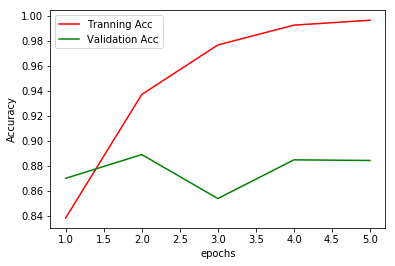

In [67]:
history_plot_acc(history)

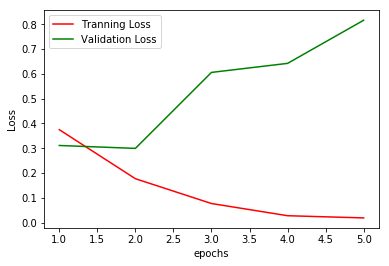

In [68]:
history_plot_loss(history)

In [69]:
model = get_model()

In [70]:
model.fit(x=partial_x_train,y=partial_y_train,epochs=5,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 109us/step - loss: 0.5117 - binary_accuracy: 0.7891 - val_loss: 0.3769 - val_binary_accuracy: 0.8733
Epoch 2/5
15000/15000 [==============================] - 1s 93us/step - loss: 0.3075 - binary_accuracy: 0.9029 - val_loss: 0.3049 - val_binary_accuracy: 0.8837
Epoch 3/5
15000/15000 [==============================] - 1s 97us/step - loss: 0.2299 - binary_accuracy: 0.9260 - val_loss: 0.2726 - val_binary_accuracy: 0.8920
Epoch 4/5
15000/15000 [==============================] - 2s 101us/step - loss: 0.1809 - binary_accuracy: 0.9433 - val_loss: 0.2671 - val_binary_accuracy: 0.8907
Epoch 5/5
15000/15000 [==============================] - 1s 94us/step - loss: 0.1517 - binary_accuracy: 0.9516 - val_loss: 0.2807 - val_binary_accuracy: 0.8856


In [71]:
results = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 87us/step


In [72]:
results

[0.31745030614852904, 0.87283999999999995]

In [73]:
def get_model_more_layer():
    
    model = models.Sequential()
    model.add(layer=layers.Dense(units=32,activation="relu",input_shape=(x_train.shape[1],)))
    model.add(layer=layers.Dense(units=64,activation='relu'))
    model.add(layer=layers.Dense(units=32,activation='relu'))
    model.add(layer=layers.Dense(units=1,activation='sigmoid'))
    model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy]
             )
    return model

In [74]:
new_model = get_model_more_layer()

In [75]:
new_history = new_model.fit(x=partial_x_train,y=partial_y_train,epochs=5,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 134us/step - loss: 0.4979 - binary_accuracy: 0.7613 - val_loss: 0.3323 - val_binary_accuracy: 0.8741
Epoch 2/5
15000/15000 [==============================] - 2s 131us/step - loss: 0.2737 - binary_accuracy: 0.9003 - val_loss: 0.2736 - val_binary_accuracy: 0.8908
Epoch 3/5
15000/15000 [==============================] - 2s 132us/step - loss: 0.2021 - binary_accuracy: 0.9241 - val_loss: 0.2732 - val_binary_accuracy: 0.8890
Epoch 4/5
15000/15000 [==============================] - 2s 123us/step - loss: 0.1659 - binary_accuracy: 0.9401 - val_loss: 0.2876 - val_binary_accuracy: 0.8859
Epoch 5/5
15000/15000 [==============================] - 2s 122us/step - loss: 0.1148 - binary_accuracy: 0.9620 - val_loss: 0.3188 - val_binary_accuracy: 0.8832


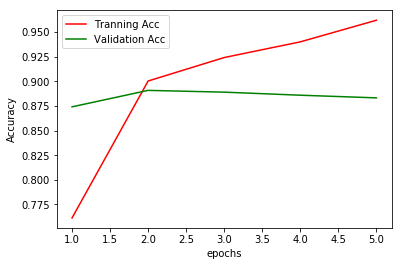

In [76]:
history_plot_acc(new_history)

In [77]:
def get_model_more_activation():
    
    model = models.Sequential()
    model.add(layer=layers.Dense(units=32,activation="tanh",input_shape=(x_train.shape[1],)))
    model.add(layer=layers.Dense(units=64,activation='sigmoid'))
    model.add(layer=layers.Dense(units=32,activation='relu'))
    model.add(layer=layers.Dense(units=1,activation='sigmoid'))
    model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy]
             )
    return model

In [78]:
new_model = get_model_more_layer()
new_history = new_model.fit(x=partial_x_train,y=partial_y_train,epochs=5,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 138us/step - loss: 0.5040 - binary_accuracy: 0.7620 - val_loss: 0.3402 - val_binary_accuracy: 0.8707
Epoch 2/5
15000/15000 [==============================] - 2s 121us/step - loss: 0.2673 - binary_accuracy: 0.9017 - val_loss: 0.2907 - val_binary_accuracy: 0.8817
Epoch 3/5
15000/15000 [==============================] - 2s 133us/step - loss: 0.2022 - binary_accuracy: 0.9259 - val_loss: 0.3696 - val_binary_accuracy: 0.8516
Epoch 4/5
15000/15000 [==============================] - 2s 132us/step - loss: 0.1534 - binary_accuracy: 0.9470 - val_loss: 0.2901 - val_binary_accuracy: 0.8858
Epoch 5/5
15000/15000 [==============================] - 2s 140us/step - loss: 0.1232 - binary_accuracy: 0.9551 - val_loss: 0.3500 - val_binary_accuracy: 0.8756


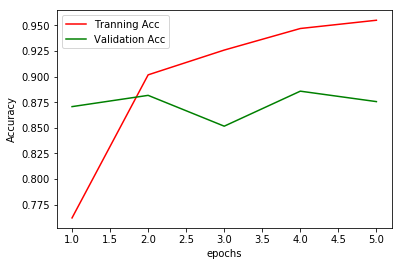

In [79]:
history_plot_acc(new_history)